In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [13]:
image_location = "H:\\AR-ExtendingOnlineGames\\my_board\\split_images\\board1\\d_3.jpg"

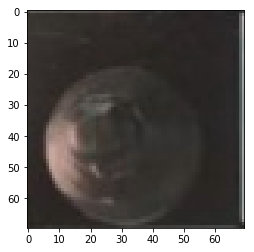

In [14]:
image = cv2.imread(image_location)
plt.imshow(image)

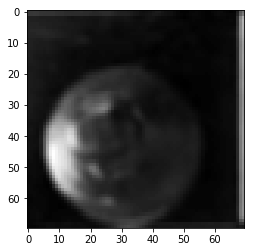

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_blurred = cv2.blur(gray_image, (3,3))
plt.imshow(gray_image_blurred, cmap='gray')

In [19]:
thresh = 100 # initial threshold (max -> 255)

# Detect edges using Canny
canny_output = cv2.Canny(gray_image_blurred, thresh, thresh * 2)

# Find contours
_, contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
print(len(contours))

4


In [ ]:
# Approximate contours to polygons + get bounding rects and circles
boundRect = [None]*len(contours)

contours_poly = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])

## Taken from [here](https://gist.github.com/bigsnarfdude/d811e31ee17495f82f10db12651ae82d)

In [16]:
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)

# find contours and get the external one
_, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)

In [17]:
# with each contour, draw boundingRect in green
# a minAreaRect in red and
print(len(contours))
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    #rect = cv2.minAreaRect(c)
    #box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    #box = np.int0(box)
    # draw a red 'nghien' rectangle
    #cv2.drawContours(image, [box], 0, (0, 0, 255))

3


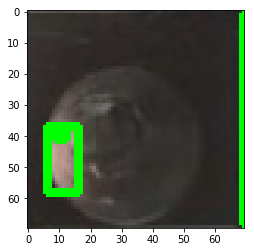

In [18]:
plt.imshow(image)